# Example of dataset using environmental rasters and sentinel imagery

Importing the providers and dataset objects:

In [10]:
from data.GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider
from data.GLC23Datasets import PatchesDataset

Define the list of providers to use in the dataset (i.e. the rasters that will be used):

In [11]:
data_path = 'data/sample_data/' # root path of the data
# configure providers
p_hfp_d = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/detailed/') # take all rasters from human footprint detailed
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/', select=['bio1', 'bio2']) # take only bio1 and bio2 from bioclimatic rasters
p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/') # take all sentinel imagery layer (r,g,b,nir)

Construct the dataset object given the list of providers and the occurrences csv file:

In [12]:
# create dataset
dataset = PatchesDataset(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb))

Testing the dataset on random occurrences:

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 9785


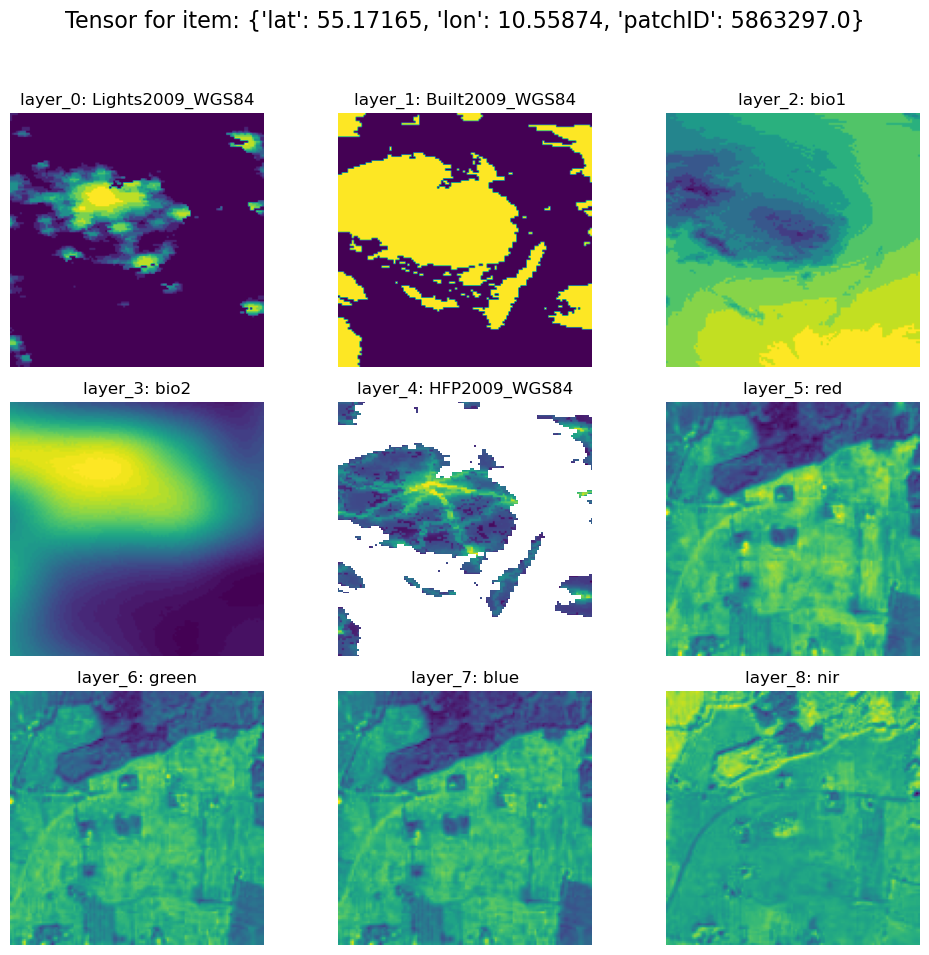

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 9669


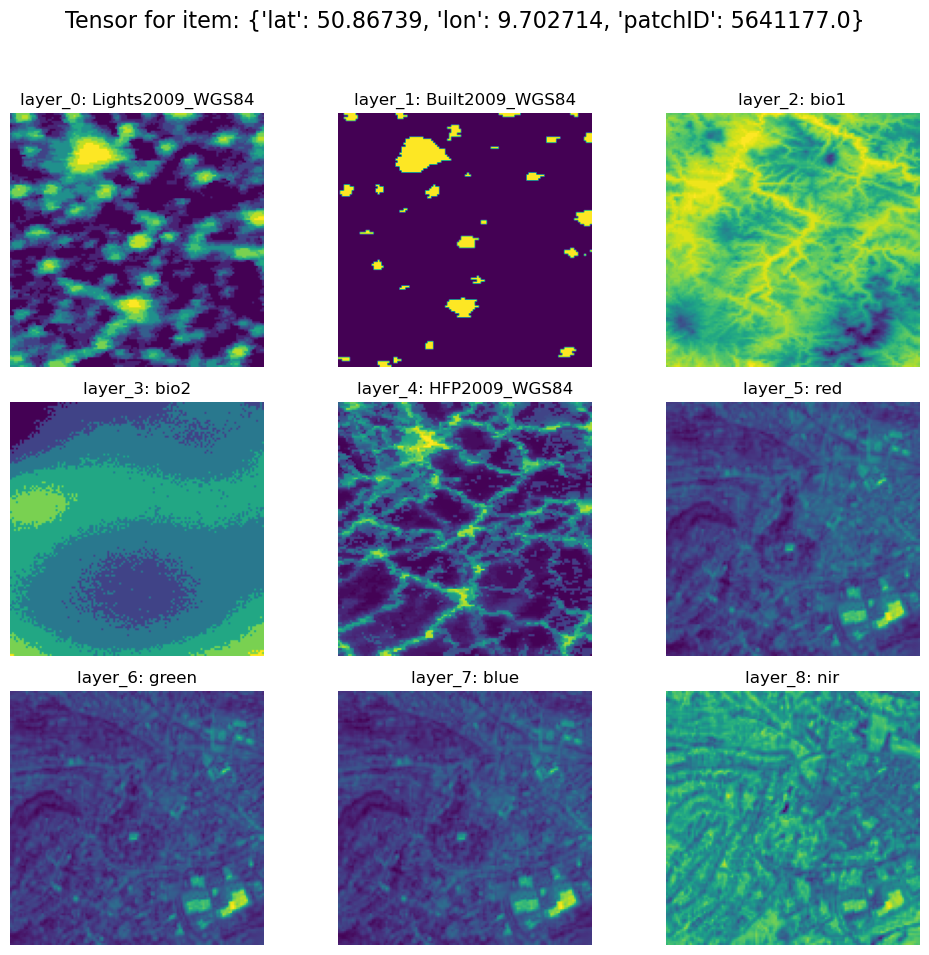

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 4102


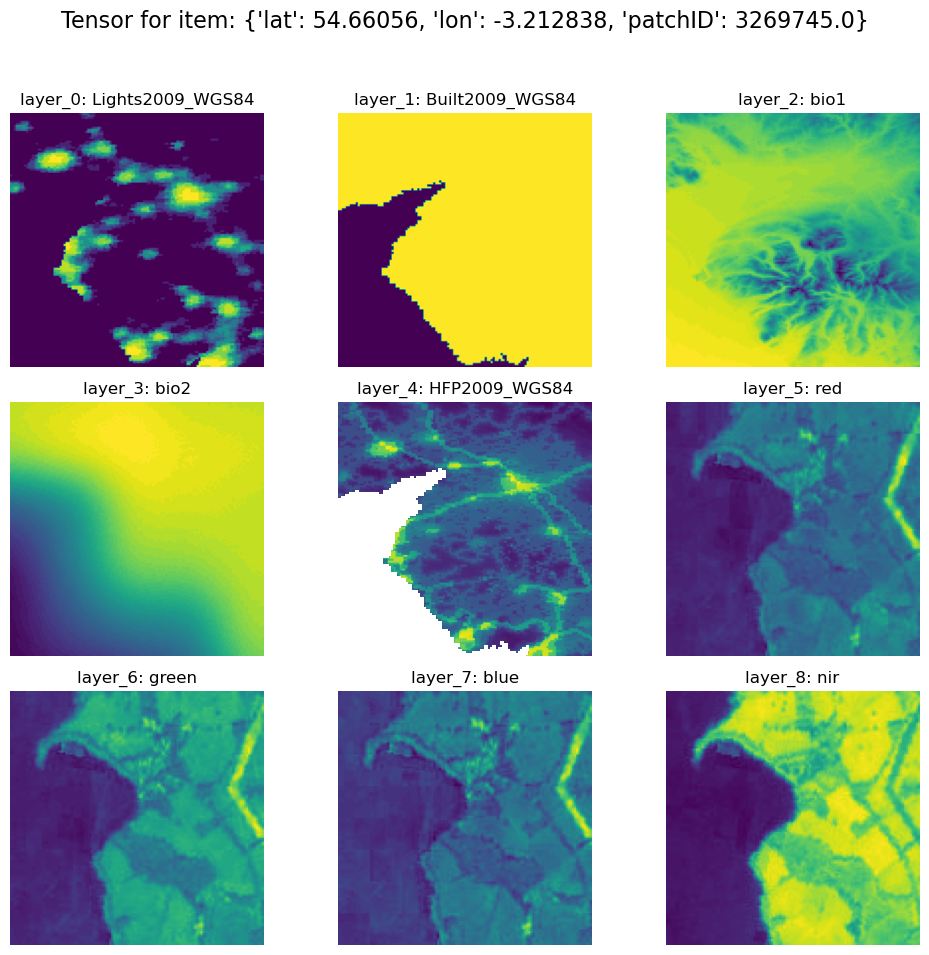

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 1131


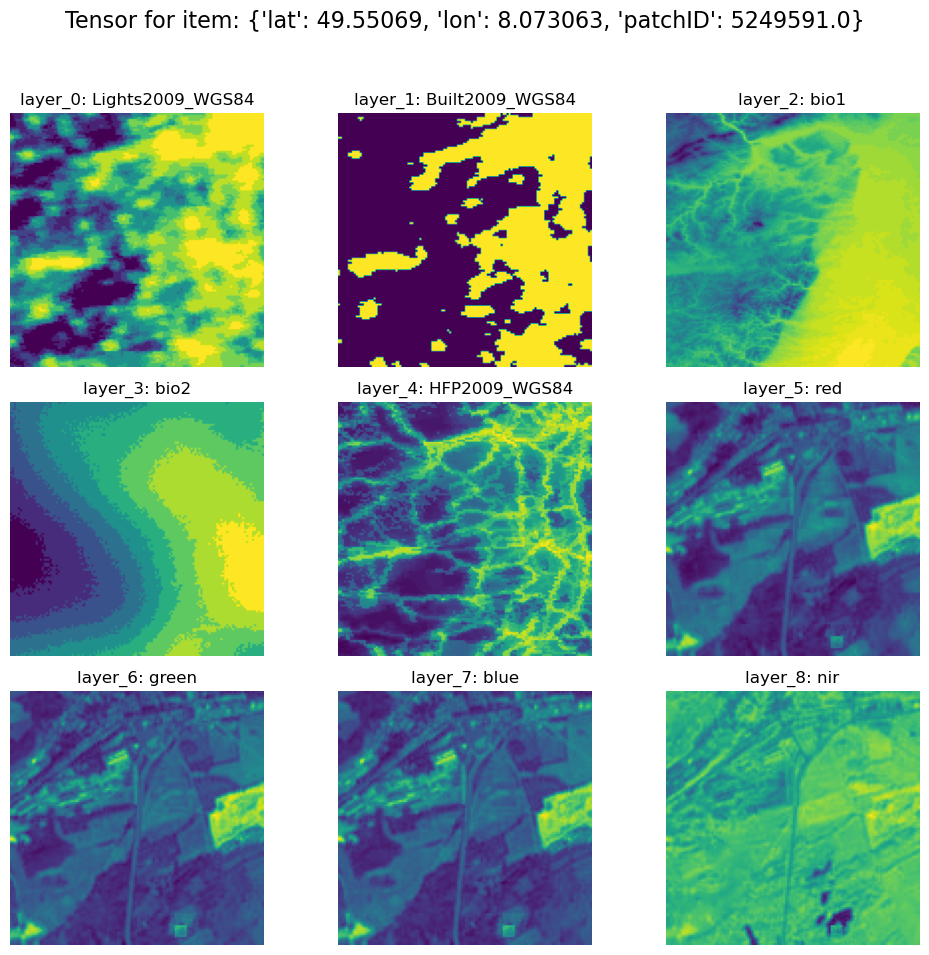

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 1580


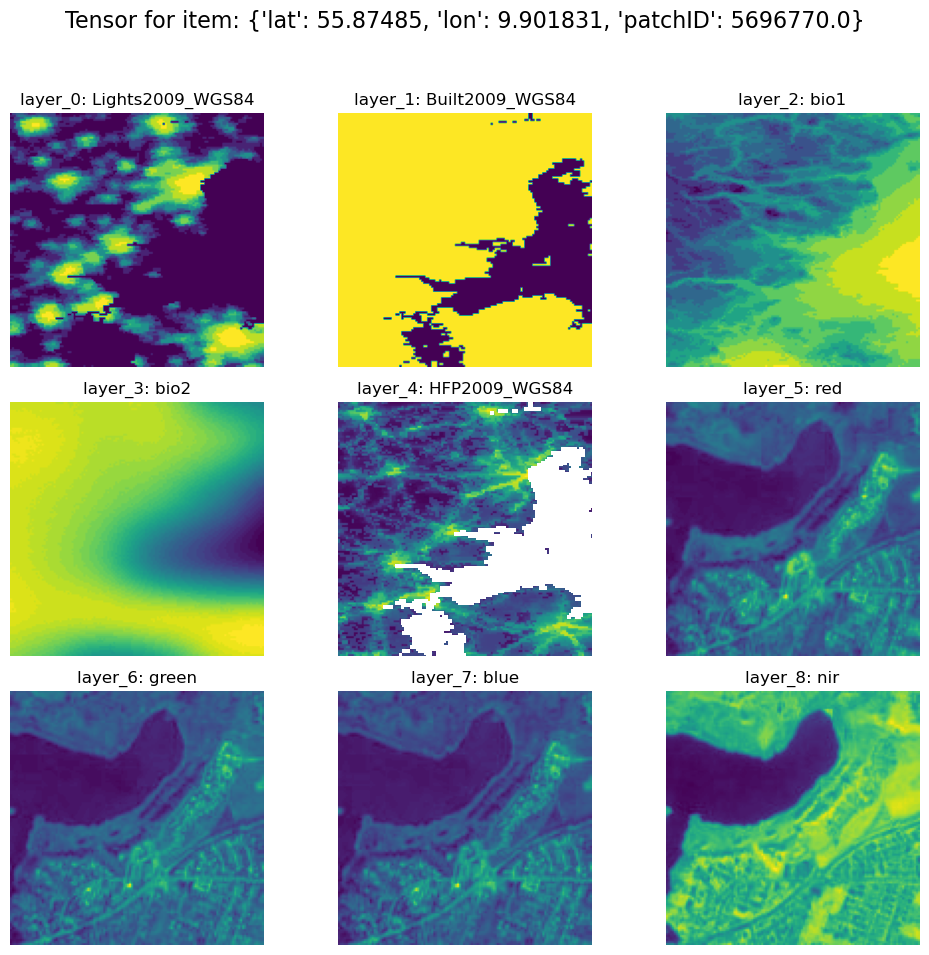

In [14]:
import random

# print random tensors from dataset
ids = [random.randint(0, len(dataset)-1) for i in range(5)]
for id in ids:
    tensor = dataset[id][0]
    label = dataset[id][1]
    print('Tensor type: {}, tensor shape: {}, label: {}'.format(type(tensor), tensor.shape, label))
    dataset.plot_patch(id)